In [ ]:
## İmport Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score


In [ ]:
## Activation Function Definitions

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def relu(z):
  return np.maximum(0, z)


In [ ]:
## Data Preprocessing

def preprocess_data(filepath):
  data = pd.read_csv(filepath)
  scaler = StandardScaler()
  X = scaler.fit_transform(data.drop('Outcome', axis=1))
  y = data['Outcome'].values
  return X, y

In [ ]:
## Forward Propagation

def forward_propagation(X, parameters):
  W1, b1, W2, b2 = parameters
  Z1 = np.dot(W1, X.T) + b1
  A1 = relu(Z1)

  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)

  cache = (Z1, A1, Z2, A2,)
  return A2, cache


In [ ]:
## Backpropagation

def back_propagation(X, y, cache, parameters):
  Z1, A1, Z2, A2 = cache
  W1, b1, W2, b2 = parameters
  m = X.shape[0]

  dA2 = A2- y
  dW2 = np.dot(dA2, A1.T) / m
  db2 = np.sum(dA2, axis=1, keepdims=True) / m

  dZ1 = np.dot(W2.T, dA2) * relu(Z1>0)
  dW1 = np.dot(dZ1, X) / m
  db1 = np.sum(dZ1, axis=1, keepdims=True) / m

  gradients = (dW1, db1, dW2, db2)
  return gradients

##  What is keepsdims = True ?

## Retains the size information of the previous matrix
## Preserves the dimensionality of the original tensor.
## Why is this important? This ensures that the gradients (db1, db2) remain consistent in size with the biases (b1, b2).
## This allows the gradients to be correctly added to the biases in the next optimization step.

In [ ]:
#3 Parameter Update

def update_parameters(parameters, gradients, learning_rate):
  W1, b1, W2, b2 = parameters
  dW1, db1, dW2, db2 = gradients

  W1 -= learning_rate * dW1
  b1 -= learning_rate * db1
  W2 -= learning_rate * dW2
  b2 -= learning_rate * db2

  return (W1, b1, W2, b2)

In [ ]:
## Model Training and Evaluation

def train_and_evaluate(X_train, y_train, X_val, y_val, layer_dims, learning_rate, num_iterations):
    np.random.seed(3)
    W1 = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
    b1 = np.zeros((layer_dims[1], 1))
    W2 = np.random.randn(layer_dims[2], layer_dims[1]) * 0.01
    b2 = np.zeros((layer_dims[2], 1))

    parameters = (W1, b1, W2, b2)
    train_loss_list = []
    val_loss_list = []

    for i in range(num_iterations):
        A2_train, cache_train = forward_propagation(X_train, parameters)
        train_loss = log_loss(y_train, A2_train.flatten())
        train_loss_list.append(train_loss)

        A2_val, cache_val = forward_propagation(X_val, parameters)
        val_loss = log_loss(y_val, A2_val.flatten())
        val_loss_list.append(val_loss)

        predictions_train = (A2_train > 0.5).astype(int)
        predictions_val = (A2_val > 0.5).astype(int)

        train_accuracy = accuracy_score(y_train, predictions_train.flatten())
        val_accuracy = accuracy_score(y_val, predictions_val.flatten())

        train_auc = roc_auc_score(y_train, A2_train.flatten())
        val_auc = roc_auc_score(y_val, A2_val.flatten())

        gradients = back_propagation(X_train, y_train, cache_train, parameters)
        parameters = update_parameters(parameters, gradients, learning_rate)

        if i % 100 == 0:
            print(
                f"Iteration {i}: Train Loss {train_loss:.4f}, Val Loss {val_loss:.4f}, "
                f"Train Accuracy {train_accuracy:.4f}, Val Accuracy {val_accuracy:.4f}, "
                f"Train AUC {train_auc:.4f}, Val AUC {val_auc:.4f}"
            )


    plt.figure(figsize=(10, 5))
    plt.plot(train_loss_list, label='Train Loss')
    plt.plot(val_loss_list, label='Val Loss')
    plt.title("Training and Validation Loss Over Epochs")
    plt.xlabel('Iterations')
    plt.ylabel('Log Loss')
    plt.legend()
    plt.show()

In [ ]:
## Main Function

def main(num_iterations=3400, learning_rate=0.01):

    X, y = preprocess_data('diabetes.csv')
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


    layer_dims = [X_train.shape[1], 2, 1]


    parameters = train_and_evaluate(X_train, y_train, X_val, y_val, layer_dims, learning_rate, num_iterations)

    return parameters


Iteration 0: Train Loss 0.6931, Val Loss 0.6931, Train Accuracy 0.6531, Val Accuracy 0.6429, Train AUC 0.4054, Val AUC 0.3319
Iteration 100: Train Loss 0.6747, Val Loss 0.6761, Train Accuracy 0.6531, Val Accuracy 0.6429, Train AUC 0.4511, Val AUC 0.3759
Iteration 200: Train Loss 0.6634, Val Loss 0.6659, Train Accuracy 0.6531, Val Accuracy 0.6429, Train AUC 0.5051, Val AUC 0.4264
Iteration 300: Train Loss 0.6566, Val Loss 0.6599, Train Accuracy 0.6531, Val Accuracy 0.6429, Train AUC 0.5679, Val AUC 0.5009
Iteration 400: Train Loss 0.6524, Val Loss 0.6564, Train Accuracy 0.6531, Val Accuracy 0.6429, Train AUC 0.6400, Val AUC 0.5678
Iteration 500: Train Loss 0.6497, Val Loss 0.6543, Train Accuracy 0.6531, Val Accuracy 0.6429, Train AUC 0.6966, Val AUC 0.6213
Iteration 600: Train Loss 0.6481, Val Loss 0.6530, Train Accuracy 0.6531, Val Accuracy 0.6429, Train AUC 0.7360, Val AUC 0.6683
Iteration 700: Train Loss 0.6470, Val Loss 0.6523, Train Accuracy 0.6531, Val Accuracy 0.6429, Train AUC 0

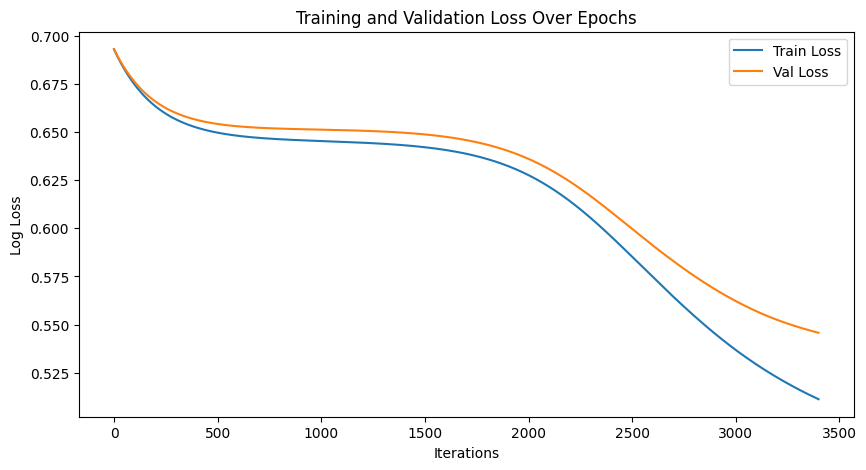

In [ ]:
## Start Model Training

parameters = main()